In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\Dell\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dell\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dell\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [3]:
import tensorflow as tf

In [4]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!','.']
data_file = open('intents.json').read()
intents = json.loads(data_file)

In [5]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [6]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(documents), "documents")


190 documents


In [7]:
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)
print (len(words), "unique lemmatized words", words)

72 classes ['goodbye', 'greeting', 'noanswer', 'question1', 'question10', 'question11', 'question12', 'question13', 'question14', 'question15', 'question16', 'question17', 'question18', 'question19', 'question2', 'question20', 'question21', 'question22', 'question23', 'question24', 'question25', 'question26', 'question27', 'question28', 'question29', 'question3', 'question30', 'question31', 'question32', 'question33', 'question34', 'question35', 'question36', 'question37', 'question38', 'question39', 'question4', 'question40', 'question41', 'question42', 'question43', 'question44', 'question45', 'question46', 'question47', 'question48', 'question49', 'question5', 'question50', 'question51', 'question52', 'question53', 'question54', 'question55', 'question56', 'question57', 'question58', 'question59', 'question6', 'question60', 'question61', 'question62', 'question63', 'question64', 'question65', 'question66', 'question67', 'question68', 'question7', 'question8', 'question9', 'thanks']


In [8]:
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))


In [9]:
training = []
output_empty = [0] * len(classes)
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

In [10]:
random.shuffle(training)
training = np.array(training)
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90 and logs.get('loss')<0.40):
            print("\nReached 9 0% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
model = Sequential()
model.add(Dense(132, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 132)               48444     
_________________________________________________________________
dropout_1 (Dropout)          (None, 132)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 38)                5054      
_________________________________________________________________
dropout_2 (Dropout)          (None, 38)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 72)                2808      
Total params: 56,306
Trainable params: 56,306
Non-trainable params: 0
_________________________________________________________________


In [13]:
sgd = SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [14]:
hist = model.fit(np.array(train_x), np.array(train_y), epochs=1500, batch_size=5, verbose=1,callbacks=[callbacks])
model.save('chatbot.h5', hist)

print("model created")


Epoch 1/1500
190/190 [==============================] - 1s 4ms/step - loss: 4.2891 - accuracy: 0.0158
Epoch 2/1500
190/190 [==============================] - 0s 1ms/step - loss: 4.2648 - accuracy: 0.0211
Epoch 3/1500
190/190 [==============================] - 0s 1ms/step - loss: 4.2384 - accuracy: 0.0263
Epoch 4/1500
190/190 [==============================] - 0s 1ms/step - loss: 4.2038 - accuracy: 0.0421
Epoch 5/1500
190/190 [==============================] - 0s 1ms/step - loss: 4.1739 - accuracy: 0.0474
Epoch 6/1500
190/190 [==============================] - 0s 1ms/step - loss: 4.1474 - accuracy: 0.0684
Epoch 7/1500
190/190 [==============================] - 0s 1ms/step - loss: 4.0912 - accuracy: 0.0579
Epoch 8/1500
190/190 [==============================] - 0s 969us/step - loss: 4.0916 - accuracy: 0.0316
Epoch 9/1500
190/190 [==============================] - 0s 1ms/step - loss: 4.0602 - accuracy: 0.0842
Epoch 10/1500
190/190 [==============================] - 0s 1ms/step - loss: 3.

190/190 [==============================] - 0s 732us/step - loss: 1.0062 - accuracy: 0.7158
Epoch 77/1500
190/190 [==============================] - 0s 816us/step - loss: 1.0601 - accuracy: 0.6895
Epoch 78/1500
190/190 [==============================] - 0s 837us/step - loss: 0.9139 - accuracy: 0.7789
Epoch 79/1500
190/190 [==============================] - 0s 943us/step - loss: 1.1006 - accuracy: 0.6421
Epoch 80/1500
190/190 [==============================] - 0s 590us/step - loss: 0.9077 - accuracy: 0.7158
Epoch 81/1500
190/190 [==============================] - 0s 632us/step - loss: 0.9352 - accuracy: 0.7000
Epoch 82/1500
190/190 [==============================] - 0s 606us/step - loss: 1.0240 - accuracy: 0.6895
Epoch 83/1500
190/190 [==============================] - 0s 548us/step - loss: 0.8043 - accuracy: 0.7368
Epoch 84/1500
190/190 [==============================] - 0s 527us/step - loss: 0.7313 - accuracy: 0.8000
Epoch 85/1500
190/190 [==============================] - 0s 542us/ste

190/190 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.8000
Epoch 155/1500
190/190 [==============================] - 0s 953us/step - loss: 0.6584 - accuracy: 0.7842
Epoch 156/1500
190/190 [==============================] - 0s 1ms/step - loss: 0.6998 - accuracy: 0.7526
Epoch 157/1500
190/190 [==============================] - 0s 1ms/step - loss: 0.7673 - accuracy: 0.7211
Epoch 158/1500
190/190 [==============================] - 0s 953us/step - loss: 0.6477 - accuracy: 0.8053
Epoch 159/1500
190/190 [==============================] - 0s 990us/step - loss: 0.7424 - accuracy: 0.7737
Epoch 160/1500
190/190 [==============================] - 0s 969us/step - loss: 0.6188 - accuracy: 0.8105
Epoch 161/1500
190/190 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.8263
Epoch 162/1500
190/190 [==============================] - 0s 1ms/step - loss: 0.5874 - accuracy: 0.7842
Epoch 163/1500
190/190 [==============================] - 0s 2ms/step -

190/190 [==============================] - 0s 685us/step - loss: 0.5527 - accuracy: 0.8158
Epoch 233/1500
190/190 [==============================] - 0s 611us/step - loss: 0.6644 - accuracy: 0.7842
Epoch 234/1500
190/190 [==============================] - 0s 658us/step - loss: 0.5741 - accuracy: 0.79470s - loss: 0.4976 - accuracy: 0.
Epoch 235/1500
190/190 [==============================] - 0s 685us/step - loss: 0.5427 - accuracy: 0.8158
Epoch 236/1500
190/190 [==============================] - 0s 669us/step - loss: 0.5106 - accuracy: 0.8421
Epoch 237/1500
190/190 [==============================] - 0s 664us/step - loss: 0.3753 - accuracy: 0.8789
Epoch 238/1500
190/190 [==============================] - 0s 674us/step - loss: 0.4763 - accuracy: 0.8632
Epoch 239/1500
190/190 [==============================] - 0s 716us/step - loss: 0.5518 - accuracy: 0.8263
Epoch 240/1500
190/190 [==============================] - 0s 727us/step - loss: 0.5337 - accuracy: 0.8263
Epoch 241/1500
190/190 [=====

190/190 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.7789
Epoch 309/1500
190/190 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.8632
Epoch 310/1500
190/190 [==============================] - 0s 974us/step - loss: 0.4786 - accuracy: 0.8316
Epoch 311/1500
190/190 [==============================] - 0s 959us/step - loss: 0.4759 - accuracy: 0.8421
Epoch 312/1500
190/190 [==============================] - 0s 1ms/step - loss: 0.5943 - accuracy: 0.8211
Epoch 313/1500
190/190 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8684
Epoch 314/1500
190/190 [==============================] - 0s 948us/step - loss: 0.4164 - accuracy: 0.8632
Epoch 315/1500
190/190 [==============================] - 0s 1ms/step - loss: 0.5761 - accuracy: 0.8158
Epoch 316/1500
190/190 [==============================] - 0s 975us/step - loss: 0.4961 - accuracy: 0.8421
Epoch 317/1500
190/190 [==============================] - 0s 1ms/step -

190/190 [==============================] - 0s 795us/step - loss: 0.5105 - accuracy: 0.8105
Epoch 386/1500
190/190 [==============================] - 0s 711us/step - loss: 0.4711 - accuracy: 0.8579
Epoch 387/1500
190/190 [==============================] - 0s 711us/step - loss: 0.4868 - accuracy: 0.8421
Epoch 388/1500
190/190 [==============================] - 0s 664us/step - loss: 0.5280 - accuracy: 0.8474
Epoch 389/1500
190/190 [==============================] - 0s 690us/step - loss: 0.4231 - accuracy: 0.8474
Epoch 390/1500
190/190 [==============================] - 0s 695us/step - loss: 0.4596 - accuracy: 0.8211
Epoch 391/1500
190/190 [==============================] - 0s 938us/step - loss: 0.4136 - accuracy: 0.8421
Epoch 392/1500
190/190 [==============================] - 0s 837us/step - loss: 0.4437 - accuracy: 0.8579
Epoch 393/1500
190/190 [==============================] - 0s 980us/step - loss: 0.4803 - accuracy: 0.8474
Epoch 394/1500
190/190 [==============================] - ETA

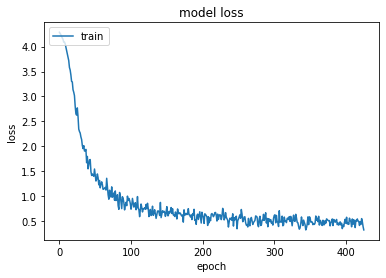

In [15]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [16]:
from keras.models import load_model
model = load_model('chatbot.h5')
import json
import random
intents = json.loads(open('intents.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [17]:
def clean_up_sentence(sentence):
    sent_words = nltk.word_tokenize(sentence)
    sent_words = [lemmatizer.lemmatize(word.lower()) for word in sent_words]
    return sent_words

In [18]:
def bow(sentence, words, show_details=True):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

In [19]:
def predict_class(sentence, model):
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.30
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

In [20]:
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intents)
    return res

In [66]:
flag=True
resp = []
while(flag==True):
    try:
        res = input('You: ')
        if res=="quit" or res=="stop" or res=='Quit' or res=="Stop":
            flag=False
            print("Bot: Okay")
        else:
            print('Bot:',chatbot_response(res))
    except Exception:
        print("Bot: Sorry I can't understand")


You: how to continue my training
Bot: Go back to the technology Page. Enter the respective tokens and then work. follow the same process every time.
You: how to get result of my training
Bot: They are just for your practice and not for our record, so you don't need the results of LP1 and LP2 training.
You: i can't see web page on mobile
Bot: Since some of you are not able to download, please find the same document in your technology drive in the folder LP3. We have made an announcement in your respective technology workgroup as well, please check
You: how to switch my technology
Bot: You cannot switch the technology currently. You have to continue with the one you are selected for. In the case of multiple form entries, you just got selected for one of them; the first one that you entered. You cannot make a switch right now
You: after lp3
Bot: You'll be given preparatory leave (PL) from April to June after that your Live Projects will be given after the first week of June.
You: what is 